<a href="https://colab.research.google.com/github/Shikha18Shukla/Machine_Learning_repo/blob/main/Lab_7_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment 7 : Train Decision Tree and Random Forest on Titanic dataset to classify survival. Visualize tree and feature importance. Perform pruning and analyze accuracy

**Step 1 : import required modules**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

**Step 2 : Load Titanic dataset**

In [2]:
titanic = sns.load_dataset("titanic")

**Step 3 : Preprocess data**

In [3]:
df = titanic[["survived", "pclass", "sex", "age", "fare", "sibsp", "parch"]].dropna()

df["sex"] = df["sex"].map({"male": 0, "female": 1})

X = df.drop("survived", axis=1)
y = df["survived"]

**Step 4 : Train-Test split**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

**Step 5 :Decision Tree (No Pruning)**


In [5]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy (No Pruning):", accuracy_score(y_test, pred_dt))

Decision Tree Accuracy (No Pruning): 0.7318435754189944


**Step 6 : Visualize Decision Tree**

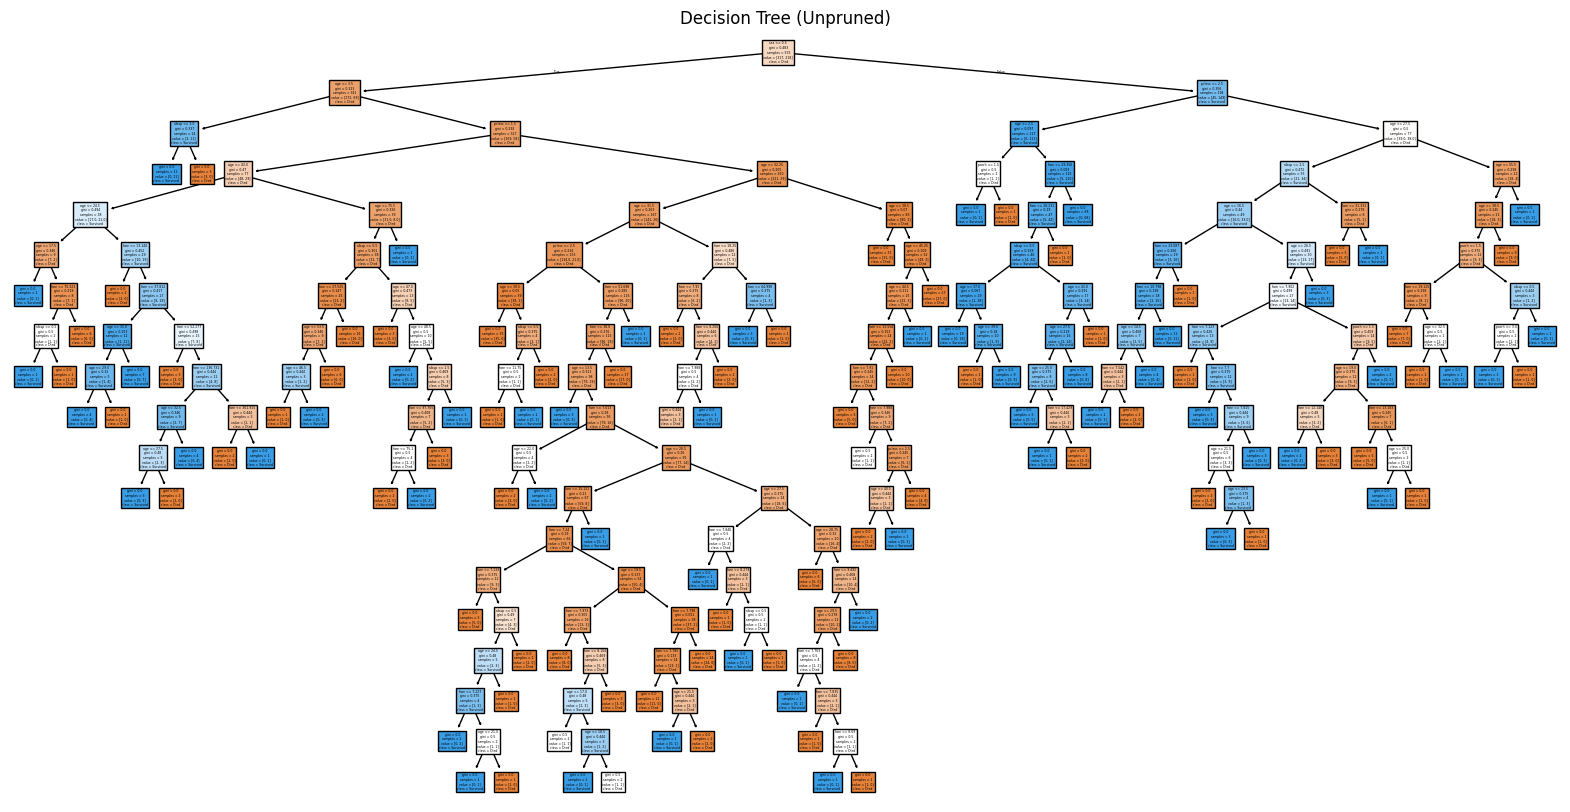

In [6]:
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=["Died", "Survived"], filled=True)
plt.title("Decision Tree (Unpruned)")
plt.show()

** Step 7 : Feature Importance (DT)**

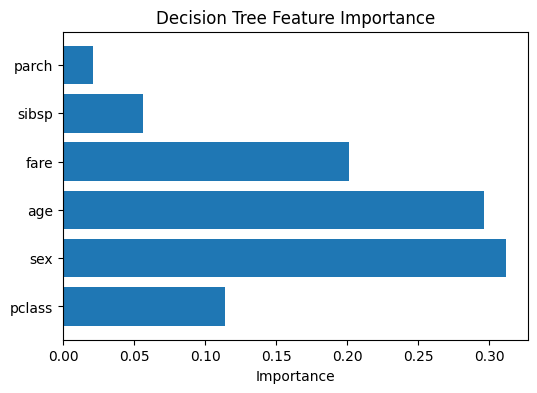

In [7]:
plt.figure(figsize=(6,4))
plt.barh(X.columns, dt.feature_importances_)
plt.title("Decision Tree Feature Importance")
plt.xlabel("Importance")
plt.show()

**Step 8 : Pruning using Cost Complexity Pruning**

In [8]:
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

trees = []
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    trees.append(clf)

**Step 9 : Evaluate all pruned trees**


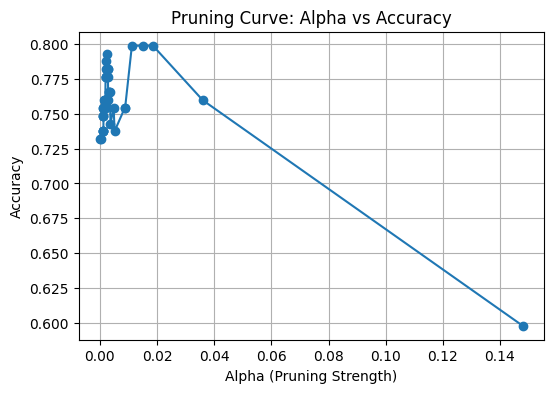

In [9]:
accuracy_values = [accuracy_score(y_test, t.predict(X_test)) for t in trees]

plt.figure(figsize=(6,4))
plt.plot(ccp_alphas, accuracy_values, marker='o')
plt.xlabel("Alpha (Pruning Strength)")
plt.ylabel("Accuracy")
plt.title("Pruning Curve: Alpha vs Accuracy")
plt.grid(True)
plt.show()

**Step 10 : Best pruned tree**

In [11]:
best_index = np.argmax(accuracy_values)
best_alpha = ccp_alphas[best_index]

dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
dt_pruned.fit(X_train, y_train)

pred_dt_pruned = dt_pruned.predict(X_test)
print("Decision Tree Accuracy (Pruned):", accuracy_score(y_test, pred_dt_pruned))
print("Best Alpha:", best_alpha)

Decision Tree Accuracy (Pruned): 0.7988826815642458
Best Alpha: 0.011185823522272119


**Step 11 : Random Forest**

In [12]:
rf = RandomForestClassifier(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)

pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, pred_rf))

Random Forest Accuracy: 0.7821229050279329


**Step 12 :  Feature Importance (Random Forest)**

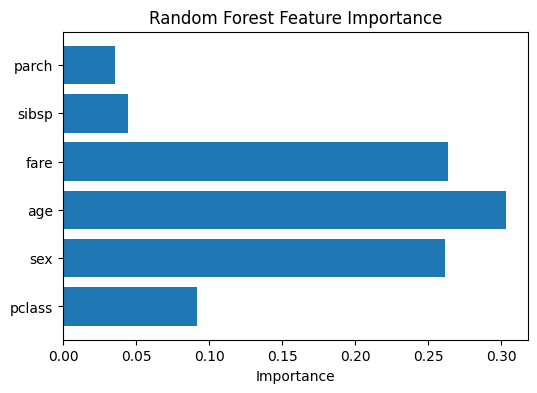

In [13]:
plt.figure(figsize=(6,4))
plt.barh(X.columns, rf.feature_importances_)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.show()
